In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df['Age'].describe()

count                                                   891
unique                                                   89
top       <bound method Series.mode of 0      22.0\n1   ...
freq                                                    177
Name: Age, dtype: object

In [8]:
df['Age'].isnull().sum()

np.int64(177)

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mode)

In [10]:
df['Age'].isnull().sum()

np.int64(0)

In [14]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [16]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
df['Embarked'].isnull().sum()

np.int64(2)

In [20]:
df['Embarked']=df['Embarked'].fillna('S')

In [21]:
df['Embarked'].isnull().sum()

np.int64(0)

In [24]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [28]:
df['Survived'].value_counts(normalize = True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [29]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [31]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [32]:
df['Pclass'].value_counts(normalize = True)*100

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

In [34]:
pd.crosstab(df['Survived'],df['Pclass'], normalize = 'columns')* 100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


In [35]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [36]:
# Encoding

df['Sex'] = df['Sex'].replace('male', 1)
df['Sex'] = df['Sex'].replace('female', 0)

C:\Users\HARSHIT SINGH\AppData\Local\Temp\ipykernel_24972\1353214818.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace('female', 0)


In [37]:
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [41]:
df.select_dtypes(include=['number']).skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

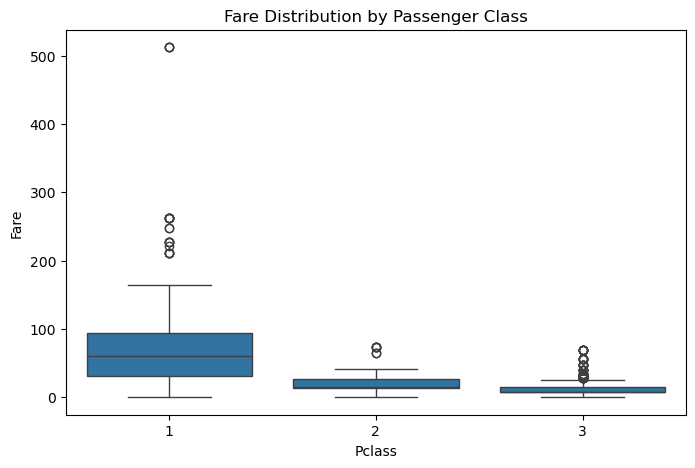

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Pclass", y="Fare", data=df)
plt.title("Fare Distribution by Passenger Class")
plt.show()

In [47]:
pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 4.1 MB/s eta 0:00:14
    --------------------------------------- 0.8/56.8 MB 4.1 MB/s eta 0:00:14
   - -------------------------------------- 1.8/56.8 MB 2.9 MB/s eta 0:00:20
   - -------------------------------------- 2.4/56.8 MB 2.9 MB/s eta 0:00:20
   -- ------------------------------------- 2.9/56.8 MB 2.9 MB/s eta 0:00:19
   -- ------------------------------------- 3.4/56.8 MB 2.6 MB/s eta 0:00:21
   --- ------------------------------------ 4.5/56.8 MB 2.9 MB/s eta 0:00:19
   --- ------------------------------------ 5.0/56.8 MB 2.9 MB/s eta 0:00:19
   ---- ----------------------------------- 5.8/56.8 MB 2.9 MB/s eta 0:00:18
   ---- ----------------------------------- 6.3/56.8 MB 2.9 MB/s eta 0:00:18
   ---- ----------------------------------- 6.8/56.8 MB 2.8 MB/s eta 0:00:18
   ----- ---------------------------------- 7.3/56.8 MB 2.8 MB/s eta 0:00:18
   ---

In [52]:
# drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [55]:
# Convert Age to numeric, coerce errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())


In [58]:
# Convert Embarked to categorical
df['Embarked'] = df['Embarked'].astype('category')

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

In [60]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [65]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    # use_label_encoder=False,
    eval_metric='logloss',
    enable_categorical = True
)

# Train model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
print("XGBoost Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1-score :", f1_score(y_test, y_pred_xgb))



XGBoost Performance:
Accuracy : 0.8044692737430168
Precision: 0.8035714285714286
Recall   : 0.6521739130434783
F1-score : 0.72


In [67]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 5.0 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 4.0 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 4.0 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 4.0 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 4.0 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 4.0 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 4.0 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 664.5 kB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


In [68]:
import lightgbm as lgb
# Initialize LightGBM classifier
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train model
lgb_model.fit(X_train, y_train)

# Predict
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate performance
print("LightGBM Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall   :", recall_score(y_test, y_pred_lgb))
print("F1-score :", f1_score(y_test, y_pred_lgb))




[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [73]:
#just tring to improve them by hyperparameter tuning

import lightgbm as lgb
# Initialize LightGBM classifier
lgb_model = lgb.LGBMClassifier(
   n_estimators=300,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train model
lgb_model.fit(X_train, y_train)

# Predict
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate performance
print("LightGBM Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall   :", recall_score(y_test, y_pred_lgb))
print("F1-score :", f1_score(y_test, y_pred_lgb))




[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
# No change in Lightgbm

In [72]:
# let's try for extreme
# Initialize XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample = 0.8,
    colsample_bytree=0.8,
    random_state=42,
    # use_label_encoder=False,
    eval_metric='logloss',
    enable_categorical = True
)

# Train model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
print("XGBoost Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1-score :", f1_score(y_test, y_pred_xgb))



XGBoost Performance:
Accuracy : 0.7877094972067039
Precision: 0.7540983606557377
Recall   : 0.6666666666666666
F1-score : 0.7076923076923077


In [ ]:
# slight improvement in  recall but accuracy and precision is decreased.